Accuracy using SVM (Sklearn): 1.0


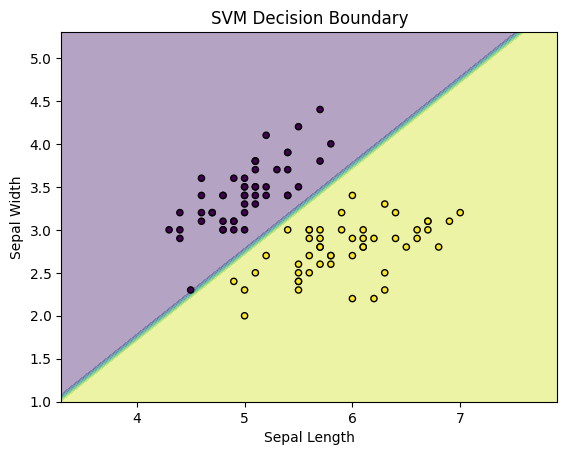

Accuracy using TensorFlow: 1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Select only the first two classes (species)
X = X[y < 2, :2]  # Using only the first two features
y = y[y < 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification using SVM with Sklearn
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy using SVM (Sklearn):", svm_accuracy)

# Plot SVM decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Classification using TensorFlow
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Using only the first two features
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluate model
_, tf_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy using TensorFlow:", tf_accuracy)